In [40]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [41]:
train_dataset = pd.read_csv('D:\\AdvancePython\\week2\\project2\\train.csv')
test_dataset = pd.read_csv('D:\\AdvancePython\\week2\\project2\\test.csv')

In [42]:
train_dataset.isna().sum().sum()

6965

In [43]:
test_dataset.isna().sum().sum()

7000

In [44]:
train_dataset .fillna(value=0,inplace=True)
test_dataset.fillna(value=0,inplace=True)

In [45]:
train_dataset.isna().sum().sum()

0

In [46]:
test_dataset.isna().sum().sum()

0

In [47]:
for i in train_dataset.columns:
  if(train_dataset[i].dtype=='object'):
    a=train_dataset[i].unique()
    b=dict()
    c=0
    for j in a:
      b.update({j:c})
      c=c+1
    train_dataset[i]=train_dataset[i].map(b)

In [48]:
for i in test_dataset.columns:
  if(test_dataset[i].dtype=='object'):
    a=test_dataset[i].unique()
    b=dict()
    c=0
    for j in a:
      b.update({j:c})
      c=c+1
    test_dataset[i]=test_dataset[i].map(b)

In [49]:
x=train_dataset.iloc[:, :-1].values
y=train_dataset.iloc[:, -1].values

x1=test_dataset.iloc[:,:].values


In [50]:

print(x1.shape,x.shape,y.shape)

(1459, 80) (1460, 80) (1460,)


In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)
y_pred1 = regressor.predict(x1)
k = mse(y_pred, y)
k

870063006.7886364

In [52]:
from sklearn.preprocessing import PolynomialFeatures
p_reg = PolynomialFeatures(degree = 1)
X_poly = p_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_pred = lin_reg.predict(X_poly)
lin_mse = mse(y,lin_pred)
lin_mse

870063006.7886364

In [53]:
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor()
rand_reg.fit(x, y)
rand_pred = rand_reg.predict(x)
rand_pred1 = rand_reg.predict(x1)
rand_mse = mse(y,rand_pred)
rand_mse

127954452.61096472

In [54]:
f=train_dataset.drop('SalePrice', axis = 1)
f_list=list(f.columns)
importances = list(rand_reg.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(f, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: OverallQual          Importance: 0.58
Variable: GrLivArea            Importance: 0.11
Variable: TotalBsmtSF          Importance: 0.04
Variable: 2ndFlrSF             Importance: 0.04
Variable: BsmtFinSF1           Importance: 0.03
Variable: 1stFlrSF             Importance: 0.02
Variable: GarageCars           Importance: 0.02
Variable: LotFrontage          Importance: 0.01
Variable: LotArea              Importance: 0.01
Variable: YearBuilt            Importance: 0.01
Variable: YearRemodAdd         Importance: 0.01
Variable: BsmtQual             Importance: 0.01
Variable: TotRmsAbvGrd         Importance: 0.01
Variable: GarageYrBlt          Importance: 0.01
Variable: GarageArea           Importance: 0.01
Variable: Id                   Importance: 0.0
Variable: MSSubClass           Importance: 0.0
Variable: MSZoning             Importance: 0.0
Variable: Street               Importance: 0.0
Variable: Alley                Importance: 0.0
Variable: LotShape             Importance: 0.

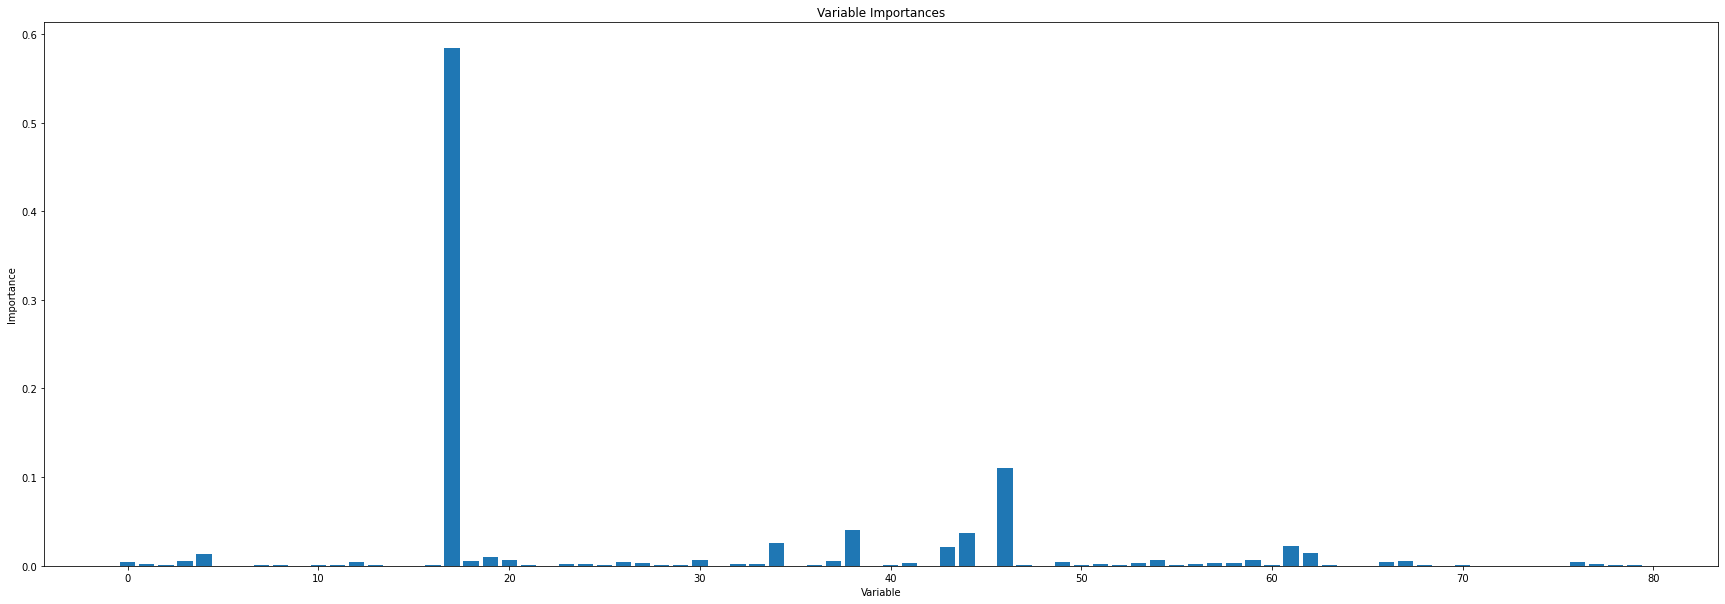

In [55]:
import matplotlib.pyplot as plt
x_values = list(range(len(importances)))
plt.figure(figsize = (30,10))
plt.bar(x_values, importances)
#plt.xticks(x_values, train_dataset.columns,rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [56]:
errors = abs(rand_pred-y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 6526.34 degrees.
Accuracy: 96.2 %.


In [38]:
rand_reg_most_important = RandomForestRegressor()
important_indices = [f_list.index('OverallQual'),f_list.index('GrLivArea'),f_list.index('TotalBsmtSF'),f_list.index('2ndFlrSF'),f_list.index('BsmtFinSF1'),f_list.index('1stFlrSF')]
train_important = x[:,important_indices]
test_important = x1[:,important_indices]
rand_reg_most_important.fit(train_important, y)
predictions = rand_reg_most_important.predict(train_important)
errors = abs(predictions - y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 8067.53 degrees.
Accuracy: 95.17 %.


In [57]:
l=list(rand_pred)
l.pop()
submission_dataset=pd.DataFrame(l)
submission_dataset.to_csv('sample_submission.csv')